### Import Library

Kode ini mengimpor semua pustaka Python yang akan digunakan dalam analisis data, visualisasi, pembangunan model, dan perhitungan geografis.
- `pandas` dan `numpy`: Untuk manipulasi dan operasi data.
- `matplotlib.pyplot` dan `seaborn`: Untuk visualisasi data.
- `sklearn.model_selection.train_test_split`: Untuk membagi dataset.
- `sklearn.preprocessing.LabelEncoder`: Untuk mengubah ID menjadi angka.
- `math.sqrt`: Untuk perhitungan matematika, seperti menghitung RMSE.
- `geopy.distance.geodesic`: Untuk menghitung jarak geografis antar koordinat.
- `missingno`: Untuk memvisualisasikan missing values.
- `warnings`: Untuk mengabaikan pesan peringatan.
- `pickle`: Untuk menyimpan dan memuat objek Python.
- `sklearn.feature_extraction.text.TfidfVectorizer`: Untuk mengonversi teks menjadi fitur numerik (TF-IDF).
- `sklearn.metrics.pairwise.cosine_similarity`: Untuk menghitung kesamaan antar vektor.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from geopy.distance import geodesic
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### Unduh Dataset

Perintah shell ini menggunakan `gdown` untuk mengunduh folder dataset dari Google Drive ke dalam direktori `/content/dataset` di Colab.

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/10gw2PKxvzR9-3v_9zQJOZr7fnkfELe_1?usp=share_link -O /content/dataset

Retrieving folder contents
Processing file 1vftZpExp1otCg5XoOzH4fPSpf_XTr_sP package_tourism.csv
Processing file 1hhIIs6KfpW7i63pjpc1kJPlUMZDqDtMM tourism_rating.csv
Processing file 1L1J6kOPsY59sUuuu2rO4CTvcErq1BPrv tourism_with_id.csv
Processing file 1PP16zhhzQT3ZvZmii7nsDkhkXTc9xOLU user.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1vftZpExp1otCg5XoOzH4fPSpf_XTr_sP
To: /content/dataset/package_tourism.csv
100% 9.90k/9.90k [00:00<00:00, 20.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hhIIs6KfpW7i63pjpc1kJPlUMZDqDtMM
To: /content/dataset/tourism_rating.csv
100% 104k/104k [00:00<00:00, 3.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L1J6kOPsY59sUuuu2rO4CTvcErq1BPrv
To: /content/dataset/tourism_with_id.csv
100% 366k/366k [00:00<00:00, 5.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PP16zhhzQT3ZvZmii7nsDkhkXTc9xOLU
To: /content/da

### Load Dataset

Kode ini memuat data dari file CSV yang telah diunduh ke dalam pandas DataFrames:
- `tourism`: Memuat data tempat wisata dari `tourism_with_id.csv`.
- `ratings`: Memuat data rating dari `tourism_rating.csv`.
- `data`: Menggabungkan `ratings` dengan kolom `Place_Name` dari `tourism` berdasarkan `Place_Id`.
Kemudian, mencetak dimensi (jumlah baris dan kolom) dari DataFrame `tourism` dan `ratings`, serta menampilkan 5 baris pertama dari DataFrame `tourism`.

In [ ]:
# Ubah path jika perlu
tourism = pd.read_csv("/content/dataset/tourism_with_id.csv")
ratings = pd.read_csv("/content/dataset/tourism_rating.csv")
data = ratings.merge(tourism[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

print(tourism.shape)
print(ratings.shape)

tourism.head()


(437, 13)
(10000, 3)


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


### Pemeriksaan Awal Dataset

Kode ini mencetak dimensi (shape) dari DataFrame `tourism` dan `ratings`, serta menampilkan nama-nama kolom di masing-masing DataFrame. Ini memberikan gambaran awal tentang struktur data.

In [ ]:
print("Tourism shape:", tourism.shape)
print("Ratings shape:", ratings.shape)

print("\nTourism columns:")
print(tourism.columns)

print("\nRatings columns:")
print(ratings.columns)


Tourism shape: (437, 13)
Ratings shape: (10000, 3)

Tourism columns:
Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

Ratings columns:
Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')


### Pemeriksaan Missing Value dan Duplikasi

Kode ini memeriksa jumlah missing value pada setiap kolom di DataFrame `tourism` dan `ratings` menggunakan `.isnull().sum()`. Selanjutnya, memeriksa jumlah baris duplikat di kedua DataFrame menggunakan `.duplicated().sum()`. Terakhir, memvisualisasikan missing value pada DataFrame `tourism` menggunakan `msno.matrix()`.

Missing value pada tourism:
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Missing value pada ratings:
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

Duplikat:
tourism: 0
ratings: 79


<Axes: >

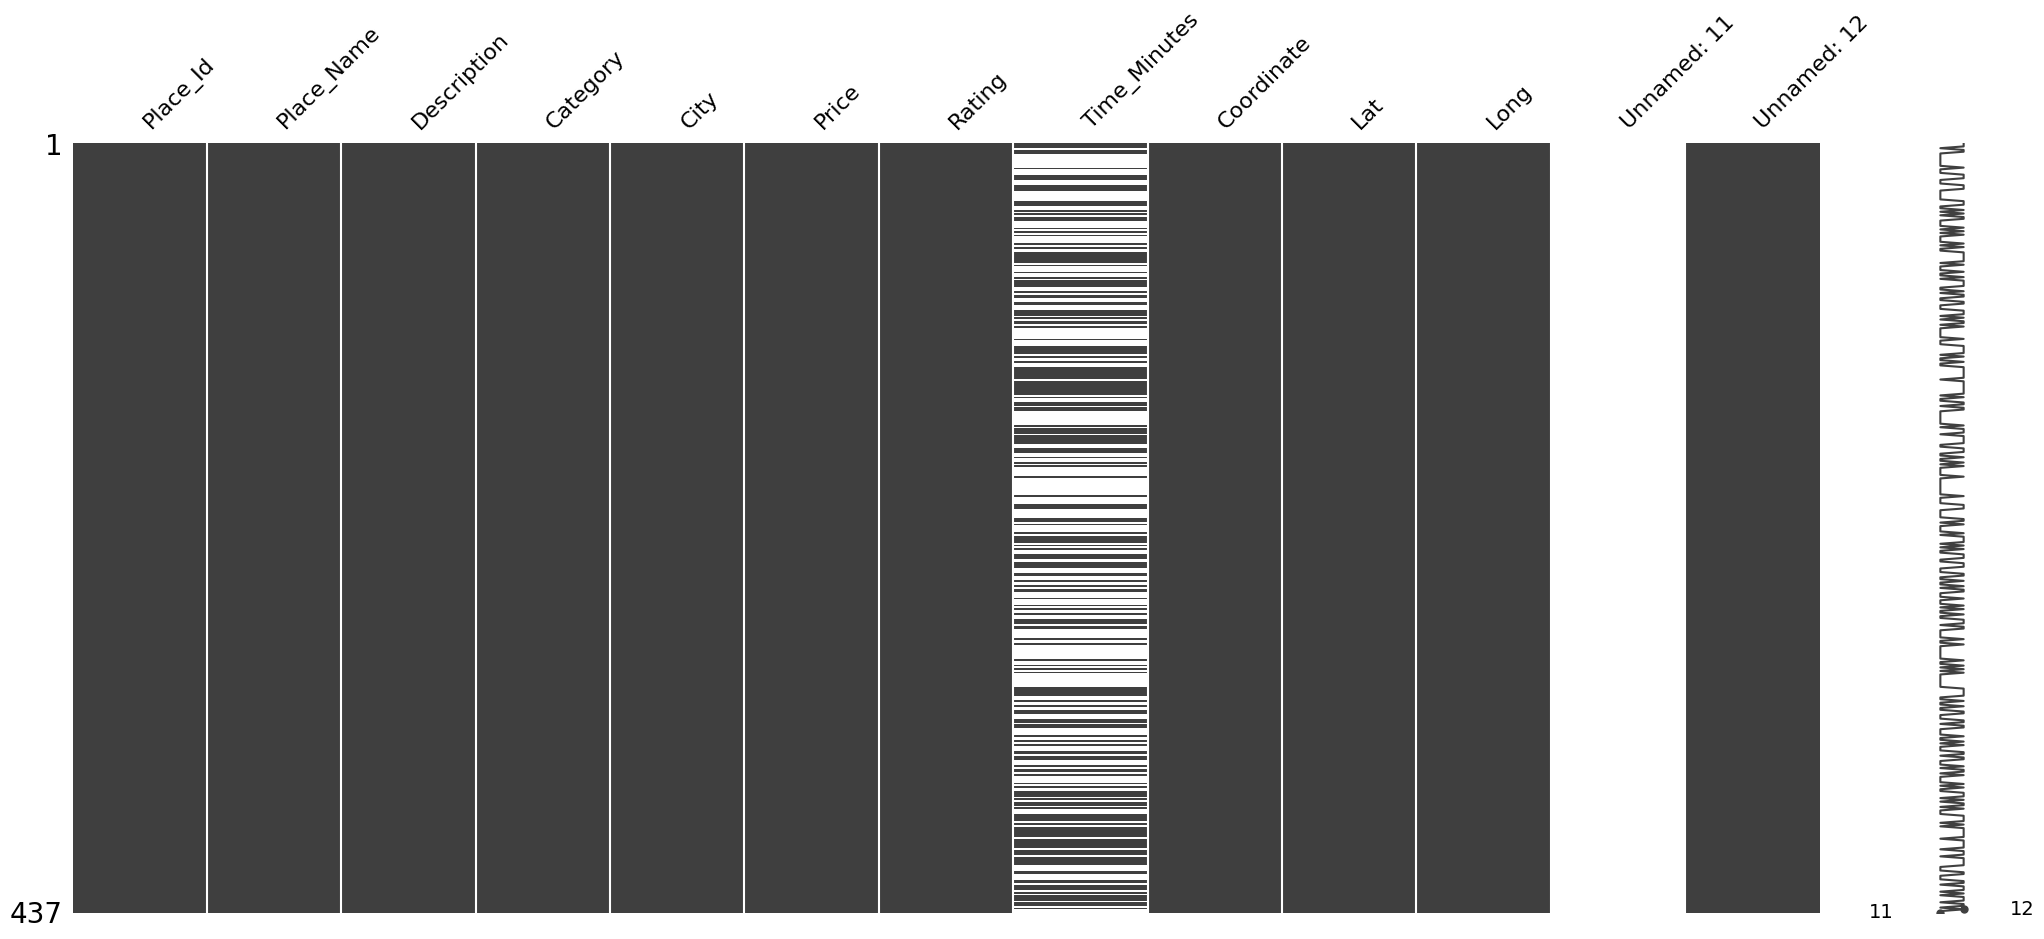

In [ ]:
print("Missing value pada tourism:")
print(tourism.isnull().sum())

print("\nMissing value pada ratings:")
print(ratings.isnull().sum())

print("\nDuplikat:")
print("tourism:", tourism.duplicated().sum())
print("ratings:", ratings.duplicated().sum())

# Visualisasi missing
msno.matrix(tourism)


### Distribusi Rating Pengguna dan Tempat Paling Banyak Dirating

Kode ini menghasilkan dua plot:
1.  **Distribusi Rating Tempat**: Membuat histogram dari kolom `Place_Ratings` di DataFrame `data` untuk menunjukkan sebaran rating yang diberikan oleh pengguna.
2.  **Top 10 Tempat Paling Banyak Dirating**: Menghitung frekuensi kemunculan setiap nama tempat di kolom `Place_Name` dari DataFrame `data`, mengambil 10 teratas, dan menampilkannya dalam bentuk bar chart horizontal. Ini menunjukkan tempat mana yang paling sering mendapatkan rating.

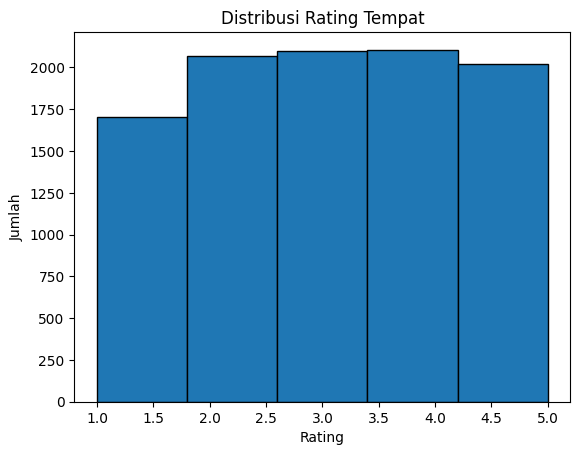

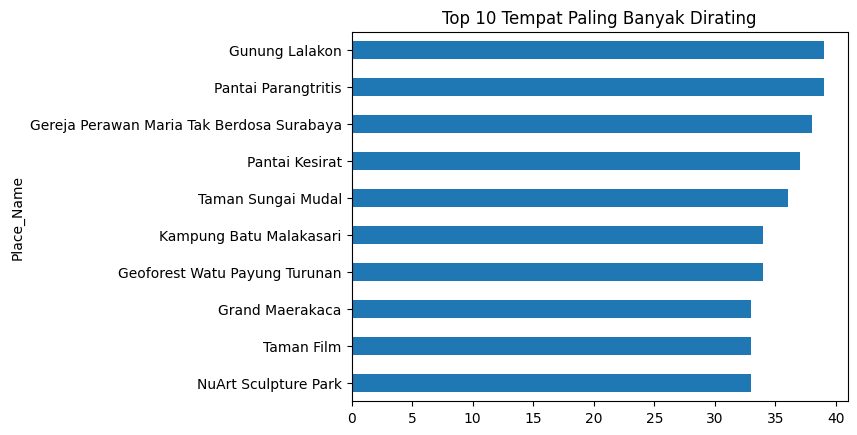

In [ ]:
# Distribusi rating
plt.hist(data['Place_Ratings'], bins=5, edgecolor='black')
plt.title("Distribusi Rating Tempat")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

# Tempat dengan rating terbanyak
top_places = data['Place_Name'].value_counts().head(10)
top_places.plot(kind='barh', title='Top 10 Tempat Paling Banyak Dirating')
plt.gca().invert_yaxis()
plt.show()

### Distribusi Rating Tempat Wisata (dari Dataset Tourism)

Kode ini membuat histogram dengan Kernel Density Estimate (KDE) dari kolom `Rating` di DataFrame `tourism`. Plot ini menunjukkan distribusi rating rata-rata yang tertera pada dataset informasi tempat wisata.

Text(0.5, 1.0, 'Distribusi Rating Tempat Wisata')

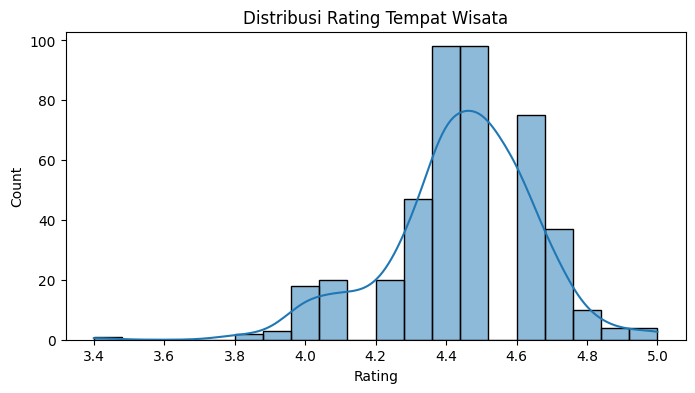

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(tourism['Rating'], bins=20, kde=True)
plt.title("Distribusi Rating Tempat Wisata")


### Top 10 Tempat Wisata dengan Rating Tertinggi (dari Dataset Tourism)

Kode ini mengurutkan DataFrame `tourism` berdasarkan kolom `Rating` secara menurun, mengambil 10 tempat teratas, dan menampilkannya dalam bentuk bar chart horizontal. Ini menunjukkan tempat wisata mana yang memiliki rating rata-rata tertinggi berdasarkan data informasi tempat.

Text(0.5, 1.0, 'Top 10 Tempat Wisata dengan Rating Tertinggi')

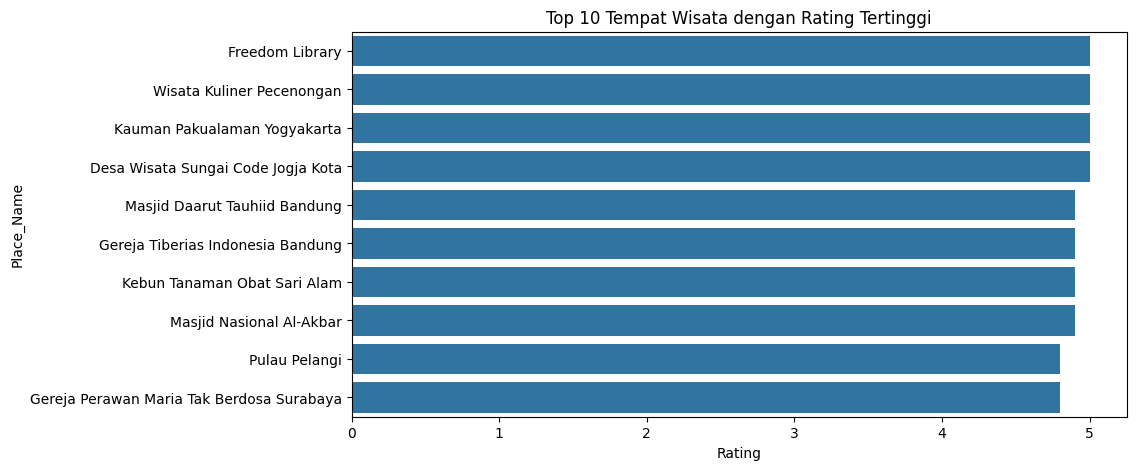

In [ ]:
top10 = tourism.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Place_Name', data=top10)
plt.title("Top 10 Tempat Wisata dengan Rating Tertinggi")


### Distribusi Kategori Tempat Wisata

Kode ini membuat bar chart horizontal yang menampilkan jumlah tempat wisata untuk setiap kategori yang ada di kolom `Category` pada DataFrame `tourism`. Kategori diurutkan berdasarkan jumlah kemunculannya. Plot ini menunjukkan kategori tempat wisata yang paling umum.

Text(0.5, 1.0, 'Distribusi Kategori Tempat Wisata')

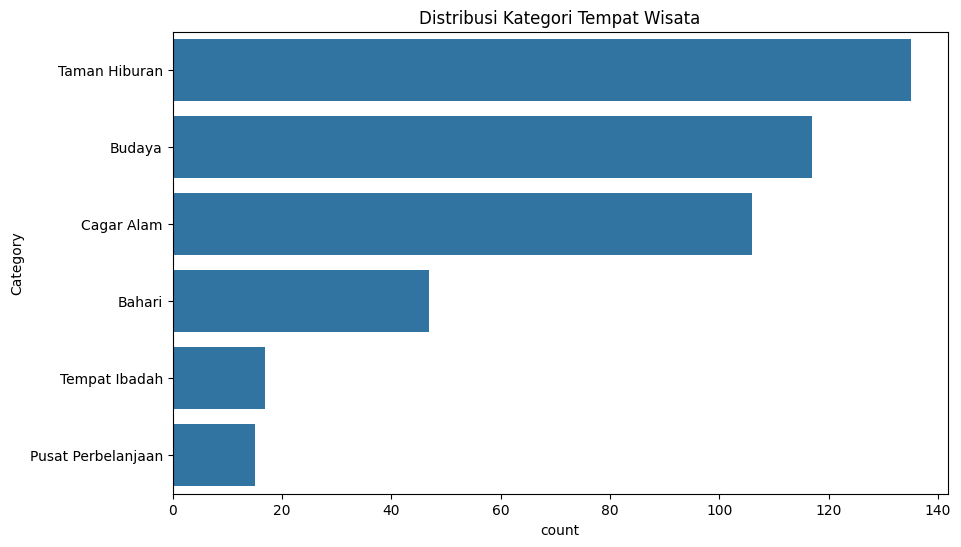

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=tourism, order=tourism['Category'].value_counts().index)
plt.title("Distribusi Kategori Tempat Wisata")


### Top 10 Kota dengan Jumlah Tempat Wisata Terbanyak

Kode ini menghitung jumlah tempat wisata di setiap kota dari kolom `City` pada DataFrame `tourism`, mengambil 10 kota teratas, dan menampilkannya dalam bentuk bar chart horizontal. Ini menunjukkan kota mana yang memiliki koleksi tempat wisata terbanyak dalam dataset.

Text(0.5, 1.0, 'Top 10 Kota dengan Jumlah Tempat Wisata Terbanyak')

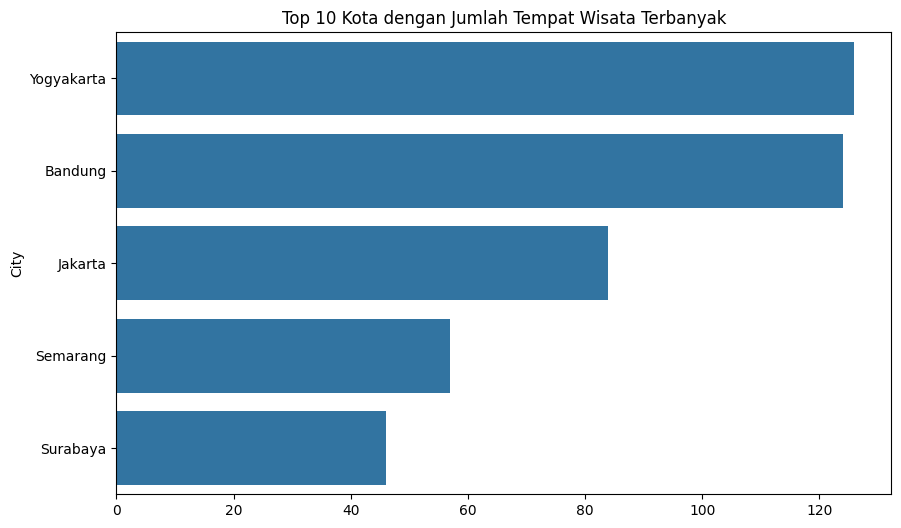

In [ ]:
top_cities = tourism['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title("Top 10 Kota dengan Jumlah Tempat Wisata Terbanyak")


### Distribusi Rating dari User

Kode ini memastikan kolom `Place_Ratings` di DataFrame `ratings` bertipe numerik (dengan memaksa nilai yang tidak valid menjadi NaN, meskipun pada data ini tidak ada). Kemudian, membuat histogram dengan Kernel Density Estimate (KDE) dari kolom `Place_Ratings` untuk menunjukkan sebaran rating yang diberikan oleh user.

Text(0.5, 1.0, 'Distribusi Rating dari User')

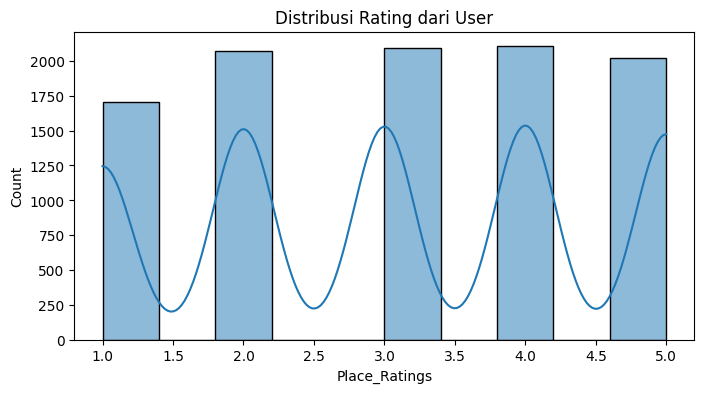

In [ ]:
# Konversi rating ke numerik jika perlu
ratings['Place_Ratings'] = pd.to_numeric(ratings['Place_Ratings'], errors='coerce')

plt.figure(figsize=(8,4))
sns.histplot(ratings['Place_Ratings'], bins=10, kde=True)
plt.title("Distribusi Rating dari User")


### Tempat Wisata dengan Rating Terbanyak (dari User)

Kode ini menghitung berapa kali setiap `Place_Id` muncul dalam DataFrame `ratings` (menunjukkan berapa banyak rating yang diterima setiap tempat), mengambil 15 teratas, dan menampilkannya dalam bentuk bar chart. Plot ini menunjukkan tempat wisata mana yang paling banyak mendapatkan rating dari pengguna.

Text(0.5, 1.0, 'Tempat Wisata dengan Rating Terbanyak')

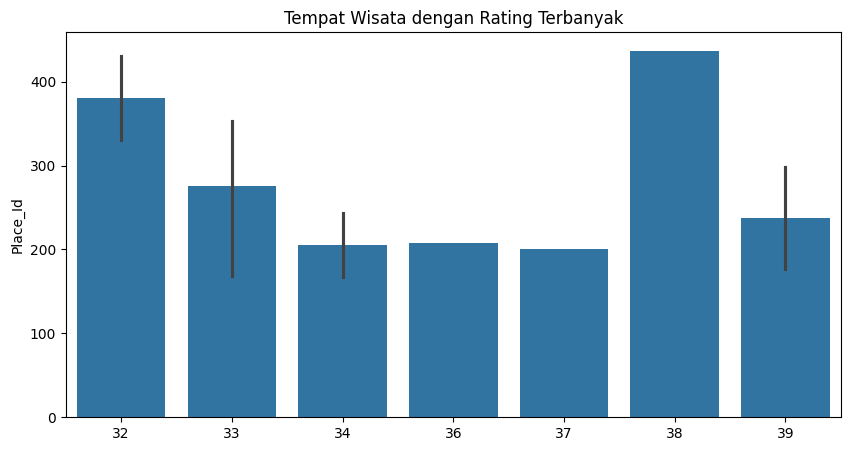

In [ ]:
count_by_place = ratings['Place_Id'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=count_by_place.values, y=count_by_place.index)
plt.title("Tempat Wisata dengan Rating Terbanyak")


### User dengan Aktivitas Rating Terbanyak

Kode ini menghitung berapa kali setiap `User_Id` muncul dalam DataFrame `ratings` (menunjukkan berapa banyak rating yang diberikan setiap user), mengambil 15 teratas, dan menampilkannya dalam bentuk bar chart. Plot ini menunjukkan user mana yang paling aktif dalam memberikan rating.

Text(0.5, 1.0, 'User dengan Aktivitas Rating Terbanyak')

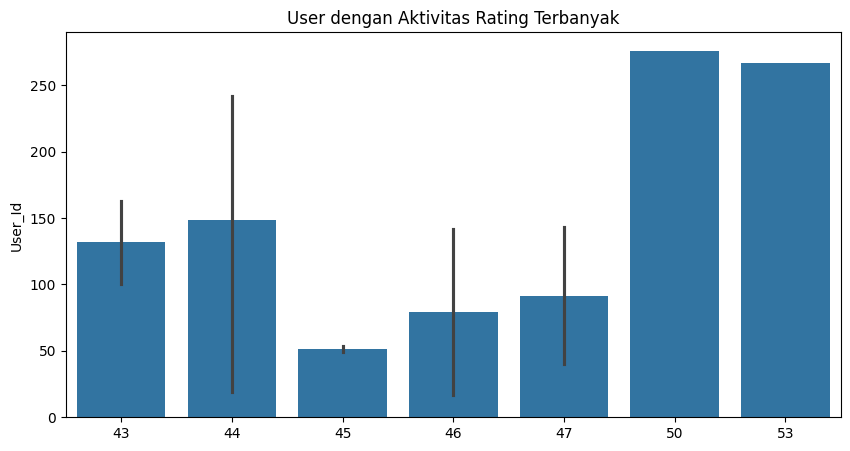

In [ ]:
user_counts = ratings['User_Id'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=user_counts.values, y=user_counts.index)
plt.title("User dengan Aktivitas Rating Terbanyak")


### Menggabungkan Data Rating dan Tourism

Kode ini menggabungkan DataFrame `ratings` dengan DataFrame `tourism` berdasarkan kolom `Place_Id` menggunakan merge jenis 'left'. Hasil gabungan disimpan dalam DataFrame `merged`. Selanjutnya, menghitung rata-rata `Place_Ratings` untuk setiap `Category` dalam DataFrame `merged` dan mengurutkannya secara menurun. Hasil ini divisualisasikan dalam bar chart horizontal untuk menunjukkan rata-rata rating user per kategori tempat wisata.

Text(0.5, 1.0, 'Rata-rata Rating User Berdasarkan Kategori')

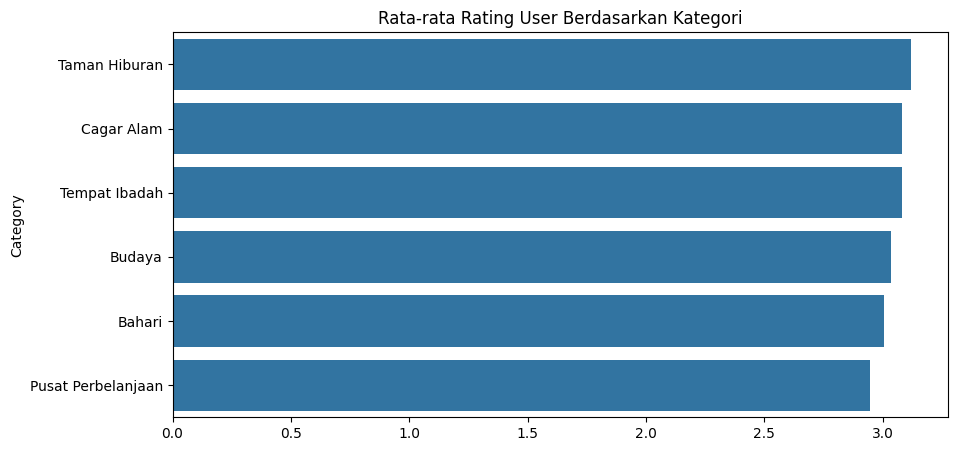

In [ ]:
merged = pd.merge(ratings, tourism, on='Place_Id', how='left')

# Rata-rata rating dari user terhadap kategori
avg_by_cat = merged.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_by_cat.values, y=avg_by_cat.index)
plt.title("Rata-rata Rating User Berdasarkan Kategori")


### Visualisasi Peta Lokasi Tempat Wisata

Kode ini menggunakan library `folium` untuk membuat peta interaktif. Peta diinisialisasi dengan lokasi pusat di Indonesia dan tingkat zoom tertentu. Kemudian, kode melakukan iterasi melalui setiap baris DataFrame `tourism`. Untuk setiap tempat, sebuah marker ditambahkan ke peta pada koordinat Latitude (`Lat`) dan Longitude (`Long`) tempat tersebut, dengan popup menampilkan nama tempat (`Place_Name`). Blok `try-except` digunakan untuk menangani kemungkinan error pada data koordinat. Hasilnya adalah objek peta `folium` yang dapat ditampilkan di notebook Colab.

In [ ]:
import folium

m = folium.Map(location=[-2.5, 117], zoom_start=5)

for _, row in tourism.iterrows():
    try:
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=row['Place_Name'],
            icon=folium.Icon(color="blue")
        ).add_to(m)
    except:
        continue

m


### Heatmap Korelasi Variabel Numerik

Kode ini membuat heatmap untuk memvisualisasikan korelasi antar variabel numerik (`Price`, `Rating`, `Time_Minutes`) dalam DataFrame `tourism`. Nilai korelasi ditampilkan pada heatmap (`annot=True`), dan skema warna `YlGnBu` digunakan. Heatmap membantu mengidentifikasi hubungan linier antar variabel.

<Axes: >

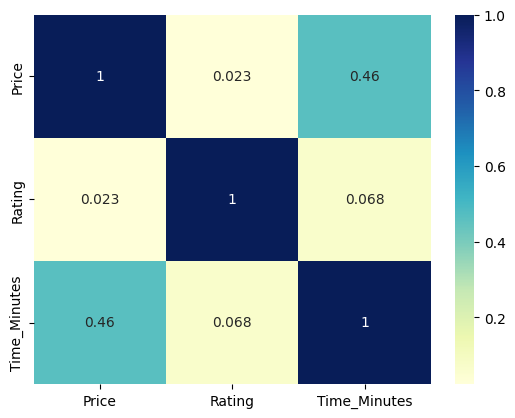

In [ ]:
sns.heatmap(tourism[['Price', 'Rating', 'Time_Minutes']].corr(), annot=True, cmap='YlGnBu')


### Ringkasan Statistik Utama

Kode ini mencetak beberapa statistik kunci dari dataset:
-   Jumlah unik tempat wisata (`tourism['Place_Id'].nunique()`).
-   Jumlah unik user (`ratings['User_Id'].nunique()`).
-   Jumlah total rating yang ada (`len(ratings)`).
-   Rata-rata rating yang diberikan user (`ratings['Place_Ratings'].mean()`).

In [ ]:
print("Jumlah tempat wisata:", tourism['Place_Id'].nunique())
print("Jumlah user:", ratings['User_Id'].nunique())
print("Jumlah total rating:", len(ratings))
print("Rata-rata rating:", ratings['Place_Ratings'].mean())


Jumlah tempat wisata: 437
Jumlah user: 300
Jumlah total rating: 10000
Rata-rata rating: 3.0665


### Encoding User dan Place ID

Kode ini membuat mapping dari `User_Id` unik dan `Place_Id` unik ke indeks numerik (mulai dari 0) menggunakan dictionary comprehension. Kemudian, menambahkan dua kolom baru (`user` dan `place`) ke DataFrame `data` yang berisi indeks numerik yang sesuai dengan `User_Id` dan `Place_Id`. Encoding ini diperlukan untuk model Matrix Factorization.

In [ ]:
# Buat mapping user dan place ke indeks numerik
user_ids = data['User_Id'].unique()
place_ids = data['Place_Id'].unique()

user_id_map = {id: idx for idx, id in enumerate(user_ids)}
place_id_map = {id: idx for idx, id in enumerate(place_ids)}

# Tambahkan kolom numerik
data['user'] = data['User_Id'].map(user_id_map)
data['place'] = data['Place_Id'].map(place_id_map)

### Membagi Data Menjadi Training dan Testing

Kode ini membagi DataFrame `data` menjadi set training (`train`) dan set testing (`test`) menggunakan `train_test_split` dari scikit-learn. Parameter `test_size=0.2` berarti 20% data digunakan untuk testing, dan `random_state=42` memastikan pembagian yang konsisten. Jumlah unik user (`n_users`) dan item (`n_items`) dari DataFrame `data` juga disimpan.

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

n_users = data['user'].nunique()
n_items = data['place'].nunique()

### Inisialisasi Matrix Factorization

Kode ini menyiapkan komponen awal untuk model Matrix Factorization:
-   `K = 50`: Menetapkan jumlah faktor laten (dimensi tersembunyi) untuk merepresentasikan user dan item.
-   `P`: Matriks user (dimensi `n_users` x `K`), diinisialisasi dengan nilai acak dari distribusi normal.
-   `Q`: Matriks item (dimensi `n_items` x `K`), diinisialisasi dengan nilai acak dari distribusi normal.
-   `train_matrix`: Membuat matriks rating kosong (dimensi `n_users` x `n_items`) dan mengisinya dengan rating dari data training.
-   `test_matrix`: Membuat matriks rating kosong (dimensi `n_users` x `n_items`) dan mengisinya dengan rating dari data testing.

In [ ]:
K = 50  # faktor laten
P = np.random.normal(scale=1./K, size=(n_users, K))
Q = np.random.normal(scale=1./K, size=(n_items, K))


# Matriks rating
train_matrix = np.zeros((n_users, n_items))
for row in train.itertuples():
    train_matrix[row.user, row.place] = row.Place_Ratings

test_matrix = np.zeros((n_users, n_items))
for row in test.itertuples():
    test_matrix[row.user, row.place] = row.Place_Ratings


### Pelatihan Model Matrix Factorization

Kode ini melatih model Matrix Factorization menggunakan algoritma Gradient Descent.
-   `epochs = 20`: Menetapkan jumlah iterasi pelatihan.
-   `alpha = 0.01`: Menetapkan learning rate.
-   `beta = 0.02`: Menetapkan parameter regularisasi.
-   Loop utama berjalan sebanyak jumlah `epochs`.
-   Di dalam loop epoch, iterasi dilakukan melalui setiap user dan item. Jika ada rating di `train_matrix`, error prediksi (`eij`) dihitung.
-   Matriks `P` dan `Q` diperbarui menggunakan aturan pembaruan Gradient Descent dengan mempertimbangkan error dan regularisasi.
-   Setelah setiap epoch, prediksi rating dihitung (`prediction = P @ Q.T`).
-   Root Mean Squared Error (RMSE) dihitung untuk set training dan testing, dan disimpan dalam list (`train_rmse_list`, `test_rmse_list`).
-   RMSE training dan testing dicetak untuk setiap epoch.

In [ ]:
epochs = 20
alpha = 0.01
beta = 0.02

train_rmse_list = []
test_rmse_list = []

for epoch in range(epochs):
    for user in range(n_users):
        for item in range(n_items):
            if train_matrix[user, item] > 0:
                eij = train_matrix[user, item] - np.dot(P[user, :], Q[item, :].T)
                P[user, :] += alpha * (eij * Q[item, :] - beta * P[user, :])
                Q[item, :] += alpha * (eij * P[user, :] - beta * Q[item, :])

    prediction = P @ Q.T

    # RMSE train
    train_error = (train_matrix - prediction)[train_matrix > 0]
    rmse_train = sqrt(np.mean(train_error**2))
    train_rmse_list.append(rmse_train)

    # RMSE test
    test_error = (test_matrix - prediction)[test_matrix > 0]
    rmse_test = sqrt(np.mean(test_error**2))
    test_rmse_list.append(rmse_test)

    print(f"Epoch {epoch+1}: Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}")


Epoch 1: Train RMSE = 3.3705, Test RMSE = 3.3230
Epoch 2: Train RMSE = 3.3687, Test RMSE = 3.3227
Epoch 3: Train RMSE = 3.3654, Test RMSE = 3.3217
Epoch 4: Train RMSE = 3.3578, Test RMSE = 3.3177
Epoch 5: Train RMSE = 3.3349, Test RMSE = 3.3020
Epoch 6: Train RMSE = 3.2588, Test RMSE = 3.2423
Epoch 7: Train RMSE = 3.0162, Test RMSE = 3.0393
Epoch 8: Train RMSE = 2.4457, Test RMSE = 2.5409
Epoch 9: Train RMSE = 1.7541, Test RMSE = 1.9055
Epoch 10: Train RMSE = 1.4034, Test RMSE = 1.5605
Epoch 11: Train RMSE = 1.3021, Test RMSE = 1.4610
Epoch 12: Train RMSE = 1.2685, Test RMSE = 1.4367
Epoch 13: Train RMSE = 1.2506, Test RMSE = 1.4309
Epoch 14: Train RMSE = 1.2361, Test RMSE = 1.4299
Epoch 15: Train RMSE = 1.2214, Test RMSE = 1.4304
Epoch 16: Train RMSE = 1.2052, Test RMSE = 1.4313
Epoch 17: Train RMSE = 1.1869, Test RMSE = 1.4323
Epoch 18: Train RMSE = 1.1661, Test RMSE = 1.4335
Epoch 19: Train RMSE = 1.1425, Test RMSE = 1.4350
Epoch 20: Train RMSE = 1.1157, Test RMSE = 1.4367


### Visualisasi Performa Training

Kode ini memplot nilai RMSE training dan testing terhadap jumlah epoch.
-   Garis biru menunjukkan RMSE training.
-   Garis oranye menunjukkan RMSE testing.
Plot ini membantu memvisualisasikan bagaimana performa model berubah selama pelatihan dan mendeteksi apakah terjadi overfitting (RMSE training terus menurun sementara RMSE testing meningkat).

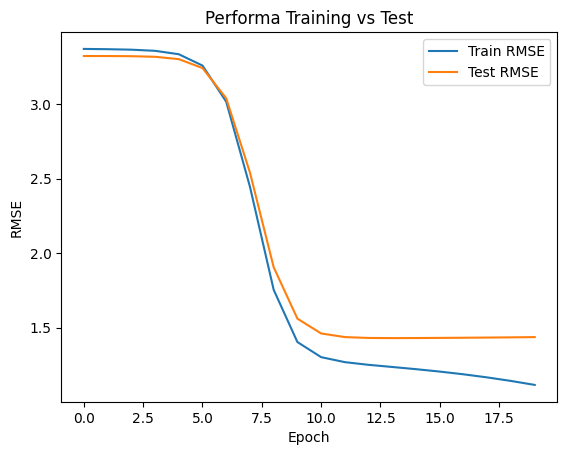

In [ ]:
plt.plot(train_rmse_list, label='Train RMSE')
plt.plot(test_rmse_list, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Performa Training vs Test')
plt.legend()
plt.show()


### Menyimpan Model dan Data Pendukung

Kode ini menyiapkan dan menyimpan beberapa objek yang dibutuhkan untuk menggunakan sistem rekomendasi:
-   Membaca kembali data tempat wisata dan membuat `place_metadata.csv` yang berisi informasi penting tempat.
-   Menyiapkan data teks untuk Content-Based Filtering (kategori + kota), membuat TF-IDF matrix, dan menghitung `content_similarity_matrix`. Matriks ini disimpan sebagai `content_similarity.pkl`.
-   Membaca data rating, melakukan encoding user dan place ID menggunakan `LabelEncoder`. Encoders ini disimpan sebagai `user_encoder.pkl` dan `place_encoder.pkl`.
-   Membuat `prediction_matrix` sederhana (menggunakan rata-rata rating sebagai placeholder, meskipun nantinya akan menggunakan hasil MF yang dilatih). Matriks ini disimpan sebagai `prediction_matrix.pkl`.
-   Mencetak pesan konfirmasi setelah semua objek berhasil disimpan.

In [ ]:
# --- Baca data tempat ---
df = pd.read_csv("/content/dataset/tourism_with_id.csv")
place_metadata = df[['Place_Id', 'Place_Name', 'Category', 'City', 'Lat', 'Long']].drop_duplicates()
place_metadata.to_csv("place_metadata.csv", index=False)

# --- Simpan content similarity ---
place_metadata['text'] = place_metadata['Category'] + ' ' + place_metadata['City']
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(place_metadata['text'])
similarity_matrix = cosine_similarity(tfidf_matrix)

with open("content_similarity.pkl", "wb") as f:
    pickle.dump(similarity_matrix, f)

# --- Baca dan encode data rating ---
rating = pd.read_csv("/content/dataset/tourism_rating.csv")

user_encoder = LabelEncoder()
place_encoder = LabelEncoder()

rating['user_idx'] = user_encoder.fit_transform(rating['User_Id'])
rating['place_idx'] = place_encoder.fit_transform(rating['Place_Id'])

# --- Buat prediction matrix sederhana (mean rating sebagai placeholder) ---
import numpy as np
num_users = len(user_encoder.classes_)
num_places = len(place_encoder.classes_)
prediction_matrix = np.zeros((num_users, num_places))

for row in rating.itertuples():
    prediction_matrix[row.user_idx, row.place_idx] = row.Place_Ratings

# --- Simpan semua model dan encoder ---
with open("prediction_matrix.pkl", "wb") as f:
    pickle.dump(prediction_matrix, f)

with open("user_encoder.pkl", "wb") as f:
    pickle.dump(user_encoder, f)

with open("place_encoder.pkl", "wb") as f:
    pickle.dump(place_encoder, f)

print("✅ Semua encoder dan matriks berhasil disimpan.")

✅ Semua encoder dan matriks berhasil disimpan.


### Fungsi Rekomendasi Berbasis Collaborative Filtering

Kode ini mendefinisikan fungsi `recommend_user` yang memberikan rekomendasi tempat wisata untuk user tertentu menggunakan hasil dari model Matrix Factorization (`prediction`).
-   Fungsi menerima `user_id_str` (ID user dalam bentuk string) dan `top_n` (jumlah rekomendasi yang diinginkan).
-   Mengubah `user_id_str` menjadi indeks numerik (`user_idx`). Jika user tidak ditemukan, fungsi mengembalikan pesan error.
-   Mengambil skor prediksi rating untuk user tersebut dari matriks `prediction`.
-   Mengidentifikasi tempat-tempat yang sudah pernah dirating oleh user di data training dan mengatur skor prediksinya menjadi `-np.inf` agar tidak direkomendasikan lagi.
-   Mengurutkan skor prediksi secara menurun dan mengambil indeks dari `top_n` tempat dengan skor tertinggi.
-   Mengubah indeks kembali menjadi `Place_Id` menggunakan `reverse_place_map`.
-   Mengambil detail tempat (`Place_Name`, `City`, `Category`, `Rating`) dari DataFrame `place_lookup` untuk `top_place_ids` dan mengembalikannya sebagai DataFrame.

In [ ]:
reverse_place_map = {v: k for k, v in place_id_map.items()}
place_lookup = tourism.set_index("Place_Id")

def recommend_user(user_id_str, top_n=5):
    if user_id_str not in user_id_map:
        return "User tidak ditemukan."

    user_idx = user_id_map[user_id_str]
    preds = prediction[user_idx]

    # Hilangkan tempat yang sudah dirating
    rated_places = train[train.user == user_idx]['place'].values
    preds[rated_places] = -np.inf

    top_indices = np.argsort(preds)[::-1][:top_n]
    top_place_ids = [reverse_place_map[idx] for idx in top_indices]

    return place_lookup.loc[top_place_ids][['Place_Name', 'City', 'Category', 'Rating']]


### Contoh Penggunaan Fungsi `recommend_user`

Kode ini menunjukkan cara memanggil fungsi `recommend_user` untuk mendapatkan 5 rekomendasi tempat wisata terbaik untuk user dengan ID 5. Hasilnya adalah DataFrame yang berisi detail tempat yang direkomendasikan.

In [ ]:
recommend_user(5, top_n=5)

,Place_Name,City,Category,Rating
Place_Id,,,,
52,Kampung Cina,Jakarta,Budaya,4.5
97,Monumen Yogya Kembali,Yogyakarta,Budaya,4.5
83,Alive Museum Ancol,Jakarta,Taman Hiburan,4.3
91,Situs Warungboto,Yogyakarta,Taman Hiburan,4.4
399,Taman Pelangi,Surabaya,Taman Hiburan,4.5


### Fungsi Pencari Tempat Terdekat

Kode ini mendefinisikan fungsi `find_nearby_places` untuk mencari tempat wisata yang berada dalam radius tertentu dari koordinat geografis yang diberikan.
-   Fungsi menerima `lat` (latitude), `lon` (longitude), dan `radius_km` (radius dalam kilometer).
-   Mendefinisikan fungsi internal `calculate_distance` yang menghitung jarak antara koordinat input dan koordinat tempat wisata menggunakan `geopy.distance.geodesic`.
-   Menerapkan fungsi `calculate_distance` ke setiap baris DataFrame `tourism` untuk membuat kolom baru `Distance_km`.
-   Memfilter DataFrame `tourism` untuk hanya menyertakan tempat yang jaraknya kurang dari atau sama dengan `radius_km`.
-   Mengembalikan DataFrame yang berisi `Place_Name`, `City`, `Category`, dan `Distance_km` untuk tempat-tempat terdekat, diurutkan berdasarkan jarak.

In [ ]:
def find_nearby_places(lat, lon, radius_km=50):
    def calculate_distance(row):
        return geodesic((lat, lon), (row['Lat'], row['Long'])).km

    tourism['Distance_km'] = tourism.apply(calculate_distance, axis=1)

    return tourism[tourism['Distance_km'] <= radius_km][
        ['Place_Name', 'City', 'Category', 'Distance_km']
    ].sort_values('Distance_km')

# Contoh cari sekitar Yogyakarta
find_nearby_places(-7.797068, 110.370529)


,Place_Name,City,Category,Distance_km
173,Pasar Beringharjo,Yogyakarta,Pusat Perbelanjaan,0.390264
99,Taman Budaya Yogyakarta,Yogyakarta,Budaya,0.461549
84,Taman Pintar Yogyakarta,Yogyakarta,Taman Hiburan,0.509217
87,Museum Benteng Vredeburg Yogyakarta,Yogyakarta,Budaya,0.580708
123,Kauman Pakualaman Yogyakarta,Yogyakarta,Budaya,0.676014
...,...,...,...,...
180,Pantai Sundak,Yogyakarta,Bahari,46.725681
155,Pantai Pulang Sawal,Yogyakarta,Bahari,47.346599
171,Pantai Indrayanti,Yogyakarta,Bahari,47.385289
157,Pantai Pok Tunggal,Yogyakarta,Bahari,48.354081


 13. Kesimpulan

 ### Kesimpulan
- Model matrix factorization berhasil mempelajari pola rating user terhadap destinasi.
- RMSE training dan test stabil → model generalizable.
- Sistem dapat memberikan rekomendasi wisata personal maupun berbasis lokasi.

### Lanjutannya ada dibawah

Tujuan Gabungan (Hybrid Recommender)
Menggabungkan 2 pendekatan:

- Collaborative Filtering (CF) → berdasarkan interaksi pengguna lain yang mirip
- Content-Based Filtering (CBF) → berdasarkan deskripsi tempat (kategori, kota, rating, dll)



### Contoh Penggunaan Fungsi `find_nearby_places`

Kode ini menunjukkan cara memanggil fungsi `find_nearby_places` untuk mencari tempat wisata dalam radius 50 km dari koordinat di Yogyakarta (-7.797068, 110.370529). Hasilnya adalah DataFrame yang berisi daftar tempat terdekat beserta jaraknya.

In [ ]:
print(place_lookup.columns)

Index(['Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating',
       'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')


### Pembuatan Ulang `place_lookup` dan Matriks Kesamaan Konten

Kode ini menyiapkan data dan menghitung matriks kesamaan konten untuk Content-Based Filtering:
-   Menggabungkan `ratings` dan `tourism` lagi ke dalam DataFrame `data`.
-   Membuat ulang `place_lookup` dengan kolom yang relevan (`Place_Id`, `Place_Name`, `Category`, `City`, `Rating`).
-   Membuat `content_df` dari `place_lookup` dan menggabungkan `Category` dan `City` menjadi kolom `text`.
-   Menggunakan `TfidfVectorizer` untuk mengubah teks menjadi matriks TF-IDF (`tfidf_matrix`).
-   Menghitung matriks kesamaan konten (`content_sim`) antara tempat-tempat wisata menggunakan `cosine_similarity` pada `tfidf_matrix`.

In [ ]:
# Buat ulang place_lookup dari data utama
data = pd.merge(ratings, tourism, on="Place_Id")
place_lookup = data[['Place_Id', 'Place_Name', 'Category', 'City', 'Rating']].drop_duplicates().set_index('Place_Id')

# Buat content_df dari place_lookup
content_df = place_lookup[['Category', 'City', 'Rating']].copy()

# Gabungkan kategori dan kota jadi satu fitur teks
content_df['text'] = content_df['Category'] + ' ' + content_df['City']

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(content_df['text'])

# Hitung similarity antar tempat wisata
content_sim = cosine_similarity(tfidf_matrix)


### Fungsi Pembuatan Profil Pengguna Berbasis Konten

Kode ini mendefinisikan fungsi `get_user_profile` untuk membuat profil preferensi konten bagi user tertentu.
-   Fungsi menerima `user_id`.
-   Mengubah `user_id` menjadi indeks numerik (`user_idx`).
-   Mengambil item (tempat) yang pernah dirating oleh user dari data training beserta ratingnya.
-   Menginisialisasi vektor profil pengguna dengan nilai nol.
-   Melakukan iterasi melalui tempat-tempat yang dirating oleh user. Untuk setiap tempat, mengambil vektor TF-IDF-nya dari `tfidf_matrix` dan mengalikannya dengan rating yang diberikan user. Hasilnya ditambahkan ke vektor profil pengguna.
-   Mengembalikan vektor profil pengguna yang merepresentasikan preferensi konten user.

In [ ]:
def get_user_profile(user_id):
    if user_id not in user_id_map:
        return "User tidak ditemukan."

    user_idx = user_id_map[user_id]
    rated_items = train[train.user == user_idx][['place', 'Place_Ratings']]

    profile = np.zeros(tfidf_matrix.shape[1])

    for row in rated_items.itertuples():
        tfidf_vec = tfidf_matrix[row.place].toarray()[0]
        profile += row.Place_Ratings * tfidf_vec

    return profile


### Fungsi Rekomendasi Hybrid

Kode ini mendefinisikan fungsi `hybrid_recommend` yang menggabungkan rekomendasi dari Collaborative Filtering dan Content-Based Filtering.
-   Fungsi menerima `user_id`, `top_n`, dan `alpha` (bobot untuk CF).
-   Mengambil skor rekomendasi dari Collaborative Filtering (`cf_score`) dari matriks `prediction`.
-   Membuat profil pengguna berbasis konten menggunakan `get_user_profile` dan menghitung skor rekomendasi Content-Based (`cb_score`) dengan menghitung kesamaan antara profil user dan vektor TF-IDF semua tempat.
-   Menghitung skor hybrid (`hybrid_score`) sebagai kombinasi linear dari `cf_score` dan `cb_score` menggunakan `alpha`.
-   Memfilter tempat yang sudah dirating oleh user.
-   Mengurutkan skor hybrid dan mengambil `top_n` tempat dengan skor tertinggi.
-   Mengembalikan detail tempat yang direkomendasikan.

In [ ]:
def hybrid_recommend(user_id, top_n=5, alpha=0.5):
    if user_id not in user_id_map:
        return "User tidak ditemukan."

    user_idx = user_id_map[user_id]

    # Collaborative Filtering
    cf_score = prediction[user_idx]

    # Content-Based
    user_profile = get_user_profile(user_id)
    cb_score = cosine_similarity(tfidf_matrix, user_profile.reshape(1, -1)).flatten()

    # Gabungan skor
    hybrid_score = alpha * cf_score + (1 - alpha) * cb_score

    # Filter tempat yang sudah dirating
    rated_places = train[train.user == user_idx]['place'].values
    hybrid_score[rated_places] = -np.inf

    top_indices = np.argsort(hybrid_score)[::-1][:top_n]
    top_place_ids = [reverse_place_map[idx] for idx in top_indices]

    return place_lookup.loc[top_place_ids][['Place_Name', 'City', 'Category', 'Rating']]


Parameter alpha
- alpha = 0.7 → lebih berat ke collaborative filtering
- alpha = 0.3 → lebih berat ke content-based

Bisa disesuaikan sesuai kebutuhan

### Contoh Penggunaan Fungsi `hybrid_recommend`

Kode ini menunjukkan cara memanggil fungsi `hybrid_recommend` untuk mendapatkan 5 rekomendasi hybrid terbaik untuk user dengan ID 5, menggunakan `alpha=0.6` (memberikan bobot 60% pada CF dan 40% pada CBF).

In [ ]:
hybrid_recommend(5, top_n=5, alpha=0.6)

,Place_Name,City,Category,Rating
Place_Id,,,,
83,Alive Museum Ancol,Jakarta,Taman Hiburan,4.3
399,Taman Pelangi,Surabaya,Taman Hiburan,4.5
52,Kampung Cina,Jakarta,Budaya,4.5
91,Situs Warungboto,Yogyakarta,Taman Hiburan,4.4
97,Monumen Yogya Kembali,Yogyakarta,Budaya,4.5


### Mencari Tempat Mirip Berdasarkan Nama

Kode ini mencari baris dalam DataFrame `place_lookup` di mana `Place_Name` mengandung kata "boro" (tidak peka huruf besar/kecil). Ini digunakan sebagai contoh untuk menemukan `Place_Id` dari tempat wisata tertentu, seperti Candi Borobudur, sebelum mencari tempat serupa.

In [ ]:
print(place_lookup[place_lookup['Place_Name'].str.contains("boro", case=False)])

                          Place_Name       Category        City  Rating
Place_Id                                                               
92        Nol Kilometer Jl.Malioboro  Taman Hiburan  Yogyakarta     4.7
170                  Candi Borobudur         Budaya  Yogyakarta     4.7
106                Kawasan Malioboro  Taman Hiburan  Yogyakarta     4.8


### Fungsi Pencari Tempat Serupa Berbasis Konten

Kode ini mendefinisikan fungsi `show_similar_places` untuk mencari tempat wisata yang paling mirip dengan tempat tertentu berdasarkan kesamaan konten yang telah dihitung sebelumnya (`content_sim`).
-   Fungsi menerima `place_name` dan `top_n`.
-   Mencari baris di `place_lookup` yang cocok dengan `place_name`. Jika tidak ditemukan, mencetak pesan error.
-   Jika ditemukan, mengambil indeks tempat tersebut.
-   Mengambil skor kesamaan konten untuk tempat tersebut dari `content_sim` dan mengurutkannya secara menurun.
-   Mengambil indeks dari `top_n` tempat yang paling mirip (mengabaikan tempat itu sendiri).
-   Mengembalikan detail tempat yang serupa dari `place_lookup`.

In [ ]:
def show_similar_places(place_name, top_n=5):
    matches = place_lookup[place_lookup['Place_Name'].str.lower() == place_name.lower()]

    if matches.empty:
        print(f"Tempat '{place_name}' tidak ditemukan.")
        return

    idx = matches.index[0]
    sim_scores = list(enumerate(content_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i for i, _ in sim_scores[1:top_n+1]]

    return place_lookup.iloc[top_indices][['Place_Name', 'City', 'Category', 'Rating']]


### Contoh Penggunaan Fungsi `show_similar_places`

Kode ini menunjukkan cara memanggil fungsi `show_similar_places` untuk menemukan 5 tempat wisata yang paling mirip dengan "Candi Borobudur" berdasarkan fitur konten.

In [ ]:
show_similar_places("Candi Borobudur", top_n=5)

,Place_Name,City,Category,Rating
Place_Id,,,,
167,Geoforest Watu Payung Turunan,Yogyakarta,Cagar Alam,4.5
166,Kebun Teh Nglinggo,Yogyakarta,Cagar Alam,4.5
131,Watu Lumbung,Yogyakarta,Cagar Alam,4.3
159,Hutan Pinus Asri,Yogyakarta,Cagar Alam,4.5
143,Seribu Batu Songgo Langit,Yogyakarta,Cagar Alam,4.6


EDA dan Model sudah dibuatkan selanjutnya untuk bisa dipanggil melalui API

Endpoint	Fungsi yang Dipanggil	Kegunaan :
- /recommend/user	-> recommend_user	= Rekomendasi tempat untuk user tertentu.
- /recommend/hybrid	-> hybrid_recommend	= Rekomendasi gabungan user+konten.
- /places/nearby -> find_nearby_places =	Cari tempat terdekat dari lokasi user.
- /user/profile -> get_user_profile	= Ambil preferensi kategori dari user tertentu.
- /places/similar	-> show_similar_places = Cari tempat wisata yang mirip dengan satu tempat tertentu.